## 1st Class
> Date: April 02 (2020)

- Library that will be used: sklearn
- **Problem:** Consider that you are working to a video streaming platform and need to make a classifier to define what movie someone want watch based on what this person whatched before.


In [4]:
!pip install seaborn

In [1]:
import pandas as pd

uri = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
movies = pd.read_csv(uri)

# If you want program using pt-BR:
# movie.columns = ['filmes_id', 'Nome', 'Genero']
# To use it, you'll need to change all the variable names 
# in all the code

movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [2]:
genres = movies.genres.str.get_dummies() # Transform the genres in columns with a binary classification 
movies = pd.concat([movies, genres], axis = 1)
# movies = movies.drop(['genres'], axis = 1) # To remove the column 'genres'
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  (no genres listed)  Action  \
0  Adventure|Animation|Children|Comedy|Fantasy                   0       0   
1                   Adventure|Children|Fantasy                   0       0   
2                               Comedy|Romance                   0       0   
3                         Comedy|Drama|Romance                   0       0   
4                                       Comedy                   0       0   

   Adventure  Animation  Children  Comedy  Crime  ...  Film-Noir  Horror  \
0          1          1         1       1      0  ...          0       0   
1          1          0         1       0      0  ...          0       0   
2          0          0         0       1      0  ...          0       0   
3          0          0         0       1      0  ...          0       0   
4          0          0         0       1      0  ...          0       0   

   IMAX  Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
0     0        0        0        0       0         0    0        0  
1     0        0        0        0       0         0    0        0  
2     0        0        0        1       0         0    0        0  
3     0        0        0        1       0         0    0        0  
4     0        0        0        0       0         0    0        0  

[5 rows x 23 columns]

In [3]:
# Scalling the values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_genres = scaler.fit_transform(genres)
scaled_genres.shape

(9742, 20)

In [4]:
scaled_genres

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

## 2nd Class
> Date: April 12 (2020)

### Knowing the KMeans
- **Problem:** Now we have a list of movies where each one belong to some genres. What is showing this information to our classifier is a lot of binary columns indicating if the movie belong or not to the indicated genre in the head.

In [5]:
from sklearn.cluster import KMeans
import numpy as np

SEED = 20
np.random.seed(SEED)

# n_clusters = number of groups to be considered in the classification
model = KMeans(n_clusters = 3) 
model.fit(scaled_genres)
print(f'Groups: {(model.labels_)}') # or
# print('Groups: {}'.format(model.labels_)) # It is the same command

Groups: [0 0 1 ... 2 0 1]


### How the KMeans works

1. Create centroids according to the number of clusters defined before;

2. Separate the samples in n (n = number of clusters) areas, being that this areas are separated by a line that is between 2 consecutive centroids, exactly in the center, the half distance between them;

3. recentralize the centroids to be in the center of the samples, the place are the distance is as shorter as possible;

4. Do the steps 2 and 3 until the centroids no more need to move. 

## 3th Class
> Date: April 13 (2020)

### Visualizing the centroids
- **Problem:** Now that we know the methods and steps used by the K-Means, we can try to see how it is being used into your problem.

In [6]:
# Order of the showed genres:
print(genres.columns)
# To see the clusters center:
print(model.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.35437981  1.43893274  1.9932825   1.81273598 -0.03605145
  -0.30766533 -0.19822778 -0.64484295  1.48592731 -0.09492563 -0.23755561
   0.71869371  0.3171892  -0.11823003 -0.26971576  0.33712526 -0.38513147
  -0.17110753 -0.09354496]
 [-0.05917995 -0.25213698 -0.22697558 -0.21192202 -0.13668594  1.22932656
  -0.12763086 -0.16146284 -0.3260886  -0.14962459 -0.09175454 -0.18217019
  -0.12131169  0.06407033 -0.18912425  0.27715839 -0.20847461 -0.41512192
  -0.11441059 -0.04472797]
 [ 0.04778314  0.09105442 -0.12580902 -0.23801854 -0.25131071 -0.75782025
   0.13645343  0.13718947  0.32242893 -0.18263185  0.07467289  0.15736365
  -0.05789553 -0.09869257  0.13955    -0.12232267  0.06710235  0.32961413
 

In [7]:
# To make the data more easy to see:

groups = pd.DataFrame(data = model.cluster_centers_,
                     columns = genres.columns)
groups

(no genres listed)    Action  Adventure  Animation  Children    Comedy  \
0           -0.059180  0.354380   1.438933   1.993283  1.812736 -0.036051   
1           -0.059180 -0.252137  -0.226976  -0.211922 -0.136686  1.229327   
2            0.047783  0.091054  -0.125809  -0.238019 -0.251311 -0.757820   

      Crime  Documentary     Drama   Fantasy  Film-Noir    Horror      IMAX  \
0 -0.307665    -0.198228 -0.644843  1.485927  -0.094926 -0.237556  0.718694   
1 -0.127631    -0.161463 -0.326089 -0.149625  -0.091755 -0.182170 -0.121312   
2  0.136453     0.137189  0.322429 -0.182632   0.074673  0.157364 -0.057896   

    Musical   Mystery   Romance    Sci-Fi  Thriller       War   Western  
0  0.317189 -0.118230 -0.269716  0.337125 -0.385131 -0.171108 -0.093545  
1  0.064070 -0.189124  0.277158 -0.208475 -0.415122 -0.114411 -0.044728  
2 -0.098693  0.139550 -0.122323  0.067102  0.329614  0.102896  0.045171

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f78e5221610>,
      dtype=object)

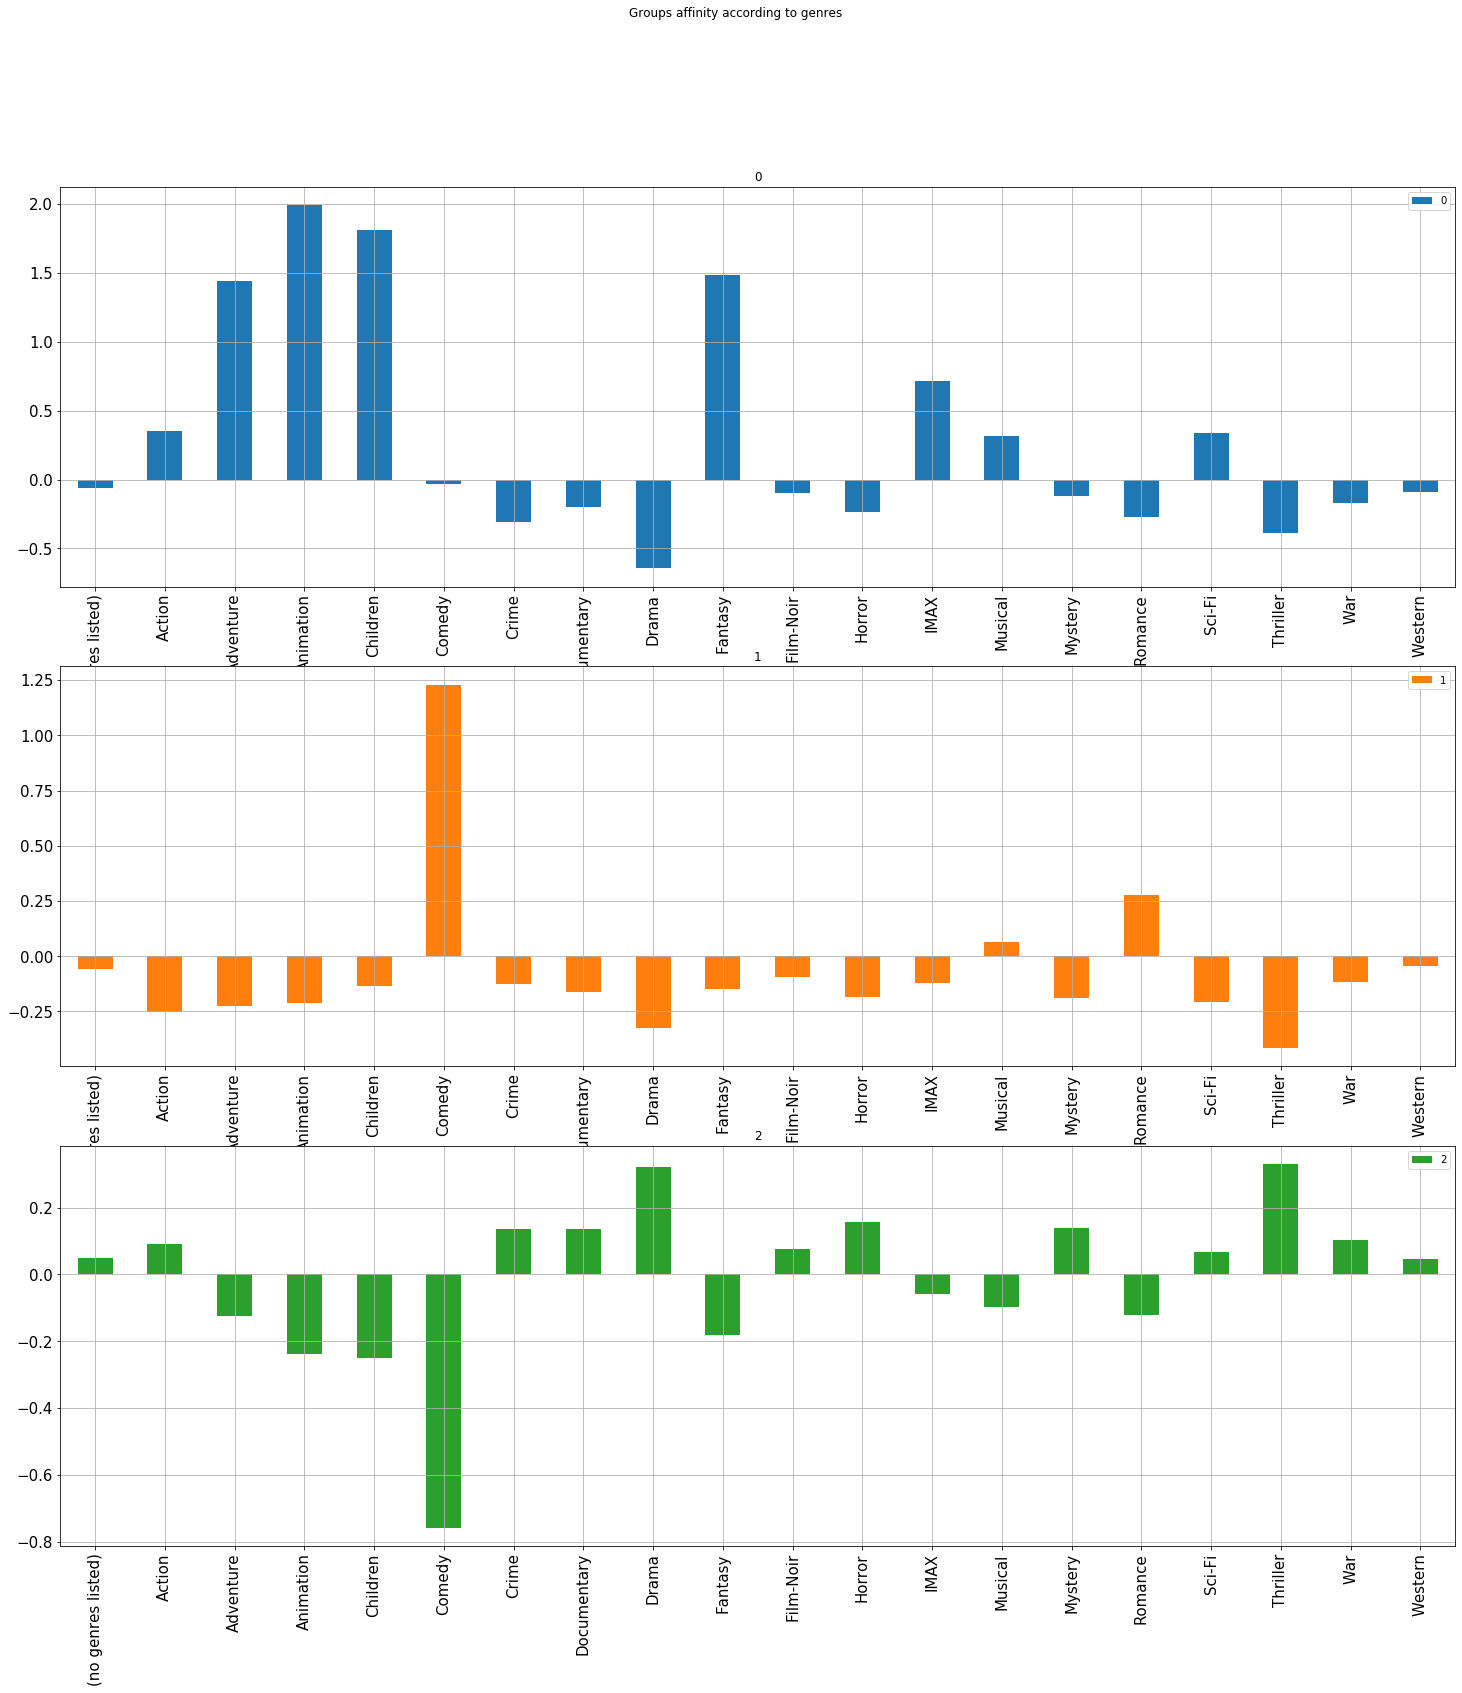

In [10]:
groups.transpose().plot.bar(subplots = True,
                            sharex   = False,
                            figsize  = [25,25], 
                            title    = 'Groups affinity according to genres',
                            fontsize = 15,
                            legend   = True, 
                            grid     = True)

In [13]:
group = 0
# Verify what films have the characteristics of the group 0, according the classifier
data_filter = model.labels_ == group 
movies[data_filter].sample(10)

movieId                                        title  \
7180    72226                     Fantastic Mr. Fox (2009)   
9621   177765                                  Coco (2017)   
9457   168090   Kizumonogatari II: Passionate Blood (2016)   
8246   104419  Justice League: Crisis on Two Earths (2010)   
1506     2034                       Black Hole, The (1979)   
1560     2097       Something Wicked This Way Comes (1983)   
7246    74089                             Peter Pan (1960)   
9127   146309                 The Boy and the Beast (2015)   
9589   175435                        The Magic Ring (1982)   
9586   175397   In the blue sea, in the white foam. (1984)   

                                         genres  (no genres listed)  Action  \
7180  Adventure|Animation|Children|Comedy|Crime                   0       0   
9621               Adventure|Animation|Children                   0       0   
9457                  Animation|Fantasy|Mystery                   0       0   
8246                    Action|Animation|Sci-Fi                   0       1   
1506                            Children|Sci-Fi                   0       0   
1560    Children|Drama|Fantasy|Mystery|Thriller                   0       0   
7246                   Children|Fantasy|Musical                   0       0   
9127                 Action|Adventure|Animation                   0       1   
9589                          Animation|Fantasy                   0       0   
9586                 Animation|Children|Fantasy                   0       0   

      Adventure  Animation  Children  Comedy  Crime  ...  Film-Noir  Horror  \
7180          1          1         1       1      1  ...          0       0   
9621          1          1         1       0      0  ...          0       0   
9457          0          1         0       0      0  ...          0       0   
8246          0          1         0       0      0  ...          0       0   
1506          0          0         1       0      0  ...          0       0   
1560          0          0         1       0      0  ...          0       0   
7246          0          0         1       0      0  ...          0       0   
9127          1          1         0       0      0  ...          0       0   
9589          0          1         0       0      0  ...          0       0   
9586          0          1         1       0      0  ...          0       0   

      IMAX  Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
7180     0        0        0        0       0         0    0        0  
9621     0        0        0        0       0         0    0        0  
9457     0        0        1        0       0         0    0        0  
8246     0        0        0        0       1         0    0        0  
1506     0        0        0        0       1         0    0        0  
1560     0        0        1        0       0         1    0        0  
7246     0        1        0        0       0         0    0        0  
9127     0        0        0        0       0         0    0        0  
9589     0        0        0        0       0         0    0        0  
9586     0        0        0        0       0         0    0        0  

[10 rows x 23 columns]

In [15]:
# t-SNE [1] is a tool to visualize high-dimensional data. 
# This algorithm reduce the quantity of dimensions of the data, allowing us to visualize what is happening
from sklearn.manifold import TSNE

tsne = TSNE()

visualization = tsne.fit_transform(scaled_genres)
visualization

array([[-50.235672, -37.55752 ],
       [ 10.802137,  36.313393],
       [ 14.490241, -24.630016],
       ...,
       [-19.091215,  15.696293],
       [ 39.08323 , -27.146544],
       [ 16.152592,   7.503103]], dtype=float32)

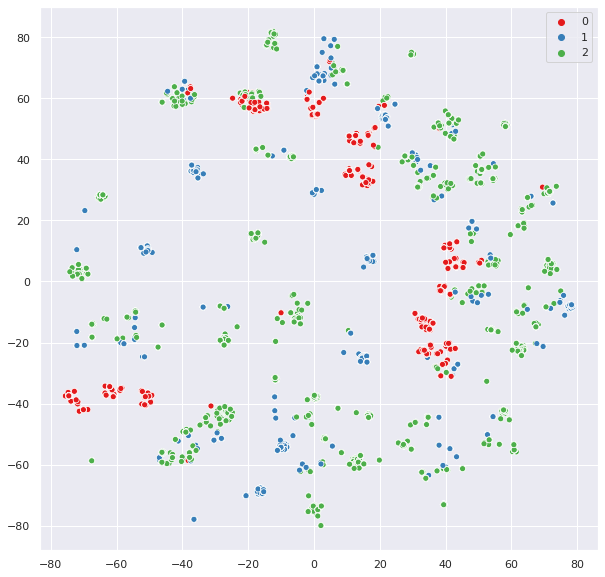

In [16]:
import seaborn as sns

sns.set(rc = {'figure.figsize' : (10,10)})

sns.scatterplot(x = visualization[:, 0],
                y = visualization[:, 1], 
                hue = model.labels_,
                palette = sns.color_palette('Set1', 3))

## 4th Class
> Date: April 24 (2020)

### Grouping in 20 groups
- **Problem:** The last class, we used our classifier using 3 clusters (or 3 groups). Now, we want test what happens if we try to use the classifier with a greater number of clusters. This is a good idea? 

In [20]:
model = KMeans(n_clusters = 20)
model.fit(scaled_genres)
groups = pd.DataFrame(data = model.cluster_centers_, columns = genres.columns)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f78cc7cecd0>,
      dtype=object)

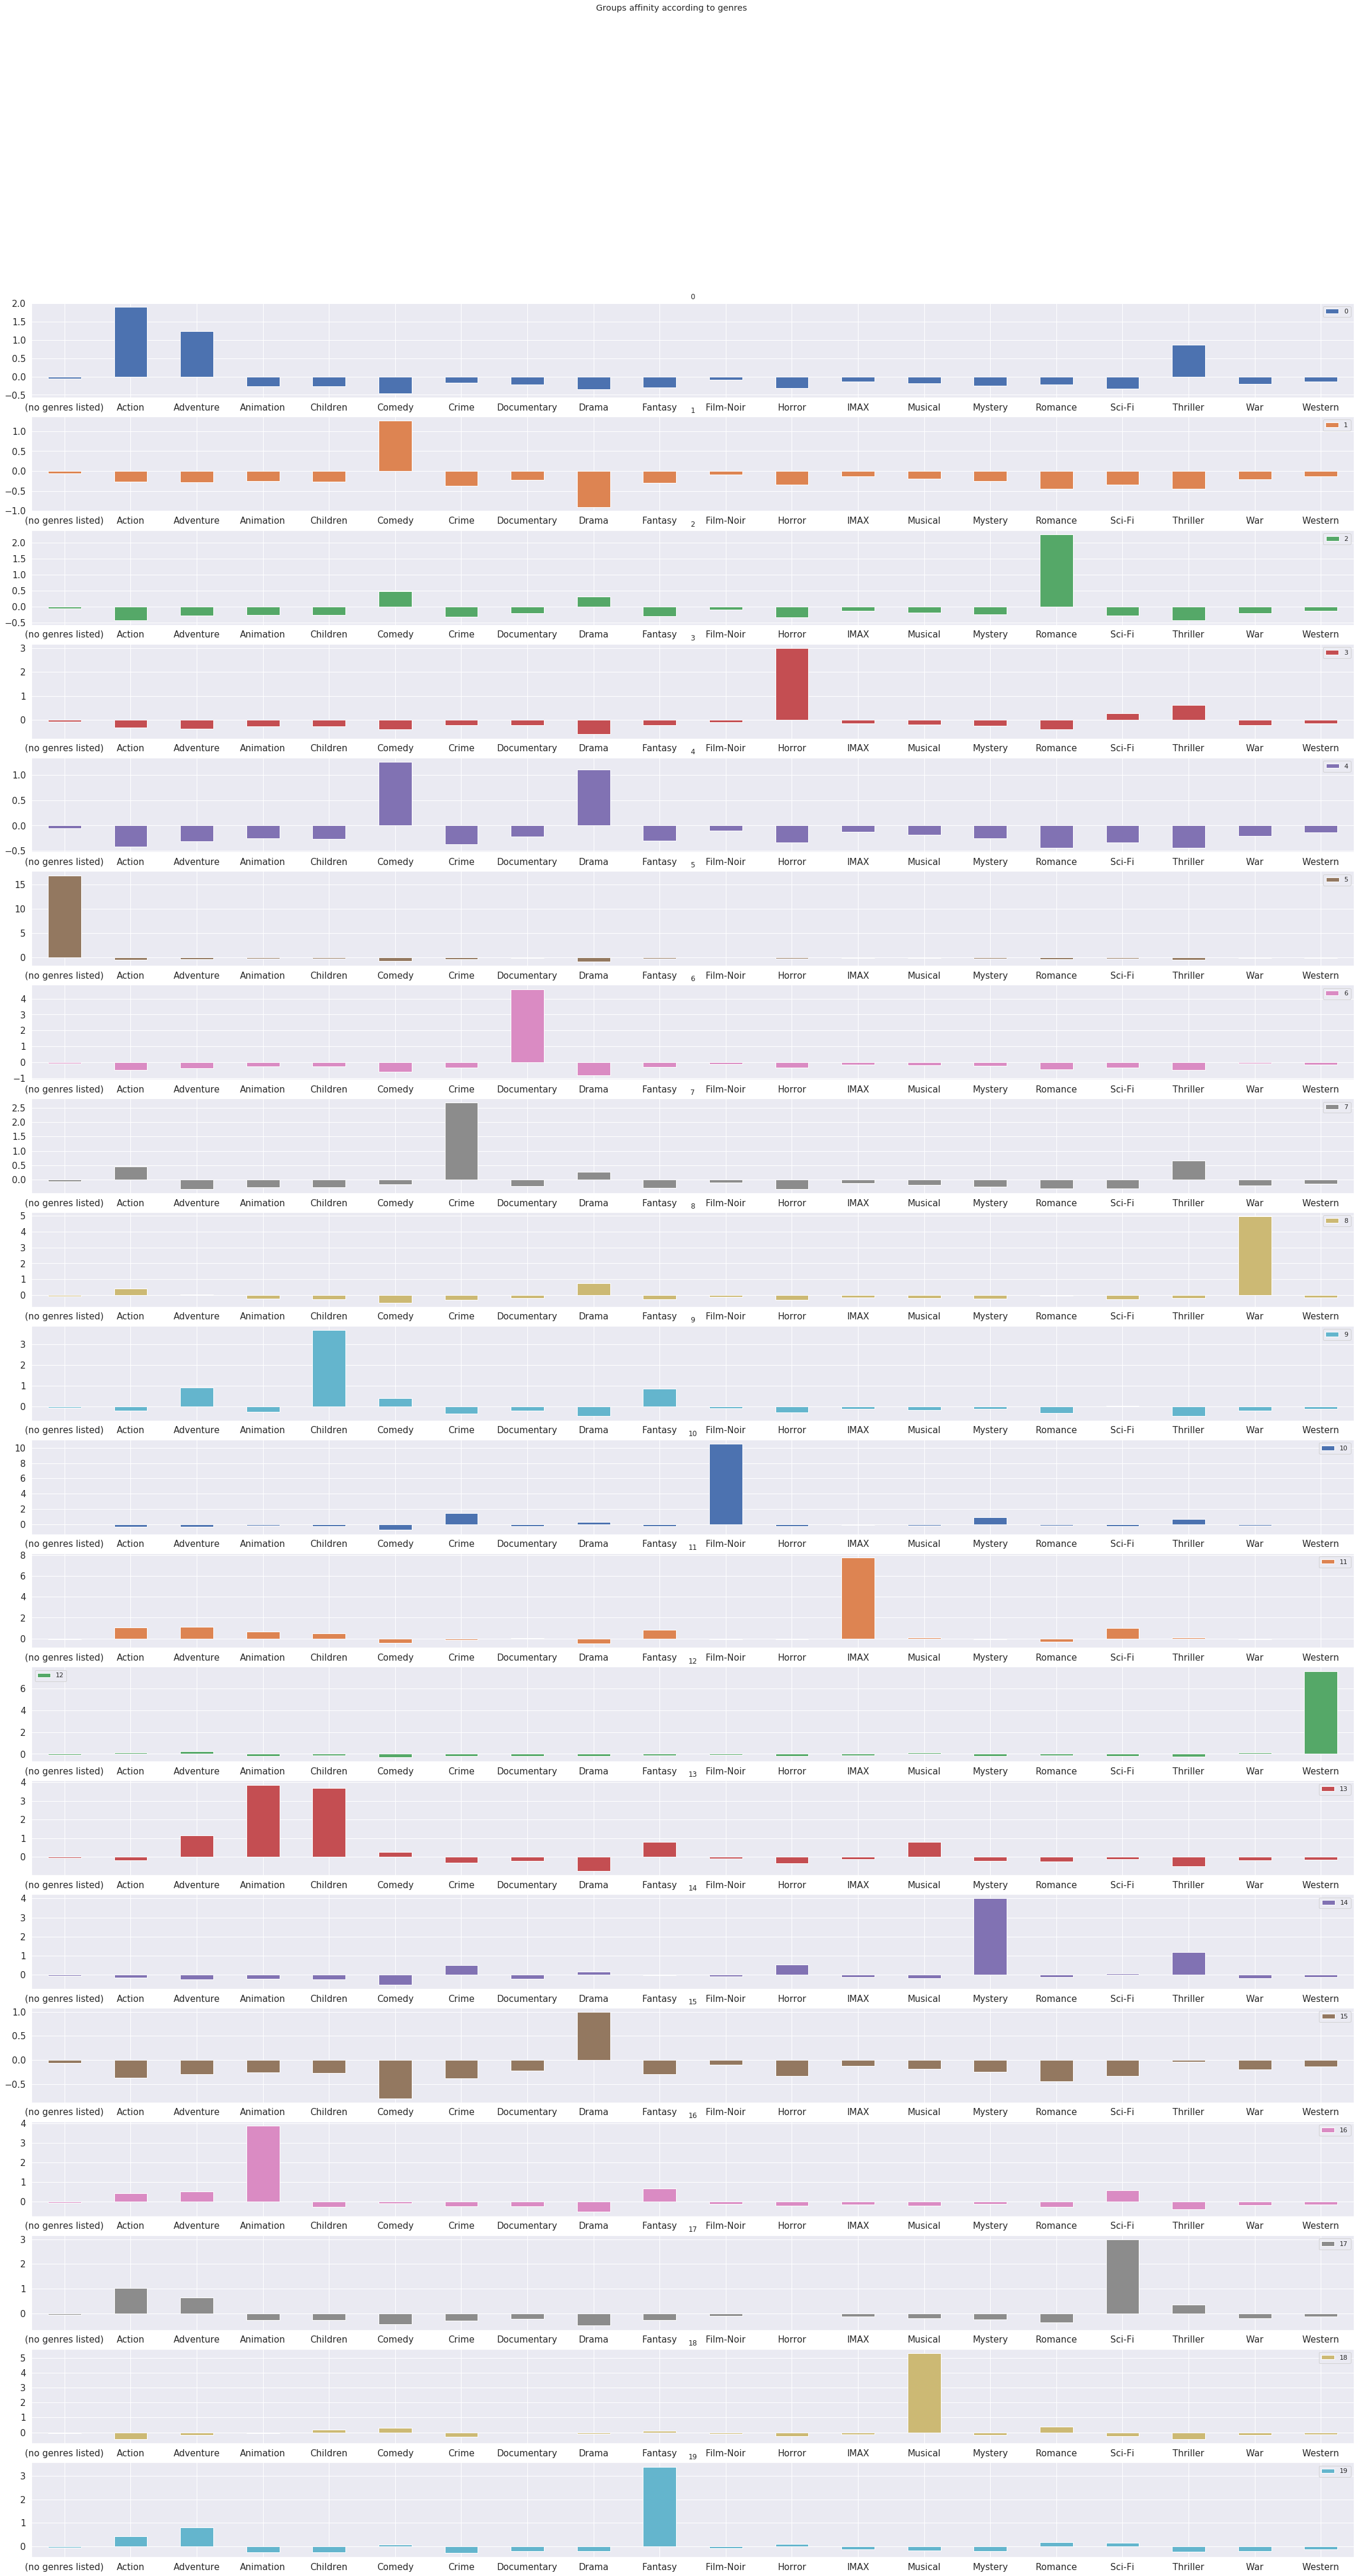

In [35]:
groups.transpose().plot.bar(subplots = True,
                            sharex   = False,
                            rot      = 0,
                            figsize  = (40,70), 
                            title    = 'Groups affinity according to genres',
                            fontsize = 15,
                            legend   = True, 
                            grid     = True)

In [41]:
group = 7
data_filter = model.labels_ == group 
movies[data_filter].sample(10)

movieId                                           title  \
9702   185135               Sherlock - A Study in Pink (2010)   
3850     5414                              Bad Company (2002)   
1475     2000                            Lethal Weapon (1987)   
5531    26585  Better Tomorrow, A (Ying hung boon sik) (1986)   
2165     2881                          Double Jeopardy (1999)   
1915     2540                           Corruptor, The (1999)   
3801     5319               Nine Queens (Nueve reinas) (2000)   
613       778                            Trainspotting (1996)   
9594   175585                              Shot Caller (2017)   
6960    65802                     Paul Blart: Mall Cop (2009)   

                           genres  (no genres listed)  Action  Adventure  \
9702                        Crime                   0       0          0   
3850          Action|Comedy|Crime                   0       1          0   
1475    Action|Comedy|Crime|Drama                   0       1          0   
5531         Crime|Drama|Thriller                   0       0          0   
2165  Action|Crime|Drama|Thriller                   0       1          0   
1915  Action|Crime|Drama|Thriller                   0       1          0   
3801               Crime|Thriller                   0       0          0   
613            Comedy|Crime|Drama                   0       0          0   
9594  Action|Crime|Drama|Thriller                   0       1          0   
6960          Action|Comedy|Crime                   0       1          0   

      Animation  Children  Comedy  Crime  ...  Film-Noir  Horror  IMAX  \
9702          0         0       0      1  ...          0       0     0   
3850          0         0       1      1  ...          0       0     0   
1475          0         0       1      1  ...          0       0     0   
5531          0         0       0      1  ...          0       0     0   
2165          0         0       0      1  ...          0       0     0   
1915          0         0       0      1  ...          0       0     0   
3801          0         0       0      1  ...          0       0     0   
613           0         0       1      1  ...          0       0     0   
9594          0         0       0      1  ...          0       0     0   
6960          0         0       1      1  ...          0       0     0   

      Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
9702        0        0        0       0         0    0        0  
3850        0        0        0       0         0    0        0  
1475        0        0        0       0         0    0        0  
5531        0        0        0       0         1    0        0  
2165        0        0        0       0         1    0        0  
1915        0        0        0       0         1    0        0  
3801        0        0        0       0         1    0        0  
613         0        0        0       0         0    0        0  
9594        0        0        0       0         1    0        0  
6960        0        0        0       0         0    0        0  

[10 rows x 23 columns]

In [81]:
def films_classifier_error(n_clusters, genres):
    model = KMeans(n_clusters = n_clusters)
    model.fit(genres)
    inertia = model.inertia_
    return [n_clusters, inertia] # Mean squared error (MSE)
        

In [82]:
films_classifier_error(20, scaled_genres)

[20, 54556.649147921285]

In [83]:
result = [films_classifier_error(n_clusters, scaled_genres) for n_clusters in range(1, 41)]
result

[[1, 194840.0],
 [2, 179664.9990790031],
 [3, 166263.56920393746],
 [4, 157120.3784147179],
 [5, 147999.68165334614],
 [6, 137019.11406271794],
 [7, 128640.83218971884],
 [8, 119687.79027267407],
 [9, 111522.61827488075],
 [10, 102368.12576063233],
 [11, 94973.53777376536],
 [12, 86489.8528200549],
 [13, 79797.25273591657],
 [14, 73611.91067347697],
 [15, 67813.21682168599],
 [16, 63555.74463549321],
 [17, 60476.730837712996],
 [18, 58429.62283383717],
 [19, 56284.08363575698],
 [20, 54984.55148136534],
 [21, 53322.90060731463],
 [22, 51830.90468951744],
 [23, 50441.85114424924],
 [24, 49394.559573974286],
 [25, 49110.84907682236],
 [26, 47277.23353495048],
 [27, 45893.48230967724],
 [28, 44860.98748068398],
 [29, 43954.696578749106],
 [30, 42390.55217416429],
 [31, 42390.88088052971],
 [32, 41279.595895599676],
 [33, 40437.770645584555],
 [34, 39587.613139645655],
 [35, 39025.766954133585],
 [36, 37224.02996532547],
 [37, 37632.32146932259],
 [38, 37084.79751600171],
 [39, 36141.76956

In [84]:
result = pd.DataFrame(result, 
                      columns = ['n_clusters', 'inertia'])
result

n_clusters        inertia
0            1  194840.000000
1            2  179664.999079
2            3  166263.569204
3            4  157120.378415
4            5  147999.681653
5            6  137019.114063
6            7  128640.832190
7            8  119687.790273
8            9  111522.618275
9           10  102368.125761
10          11   94973.537774
11          12   86489.852820
12          13   79797.252736
13          14   73611.910673
14          15   67813.216822
15          16   63555.744635
16          17   60476.730838
17          18   58429.622834
18          19   56284.083636
19          20   54984.551481
20          21   53322.900607
21          22   51830.904690
22          23   50441.851144
23          24   49394.559574
24          25   49110.849077
25          26   47277.233535
26          27   45893.482310
27          28   44860.987481
28          29   43954.696579
29          30   42390.552174
30          31   42390.880881
31          32   41279.595896
32          33   40437.770646
33          34   39587.613140
34          35   39025.766954
35          36   37224.029965
36          37   37632.321469
37          38   37084.797516
38          39   36141.769569
39          40   35673.548360

Text(0, 0.5, 'Mean Squared Error')

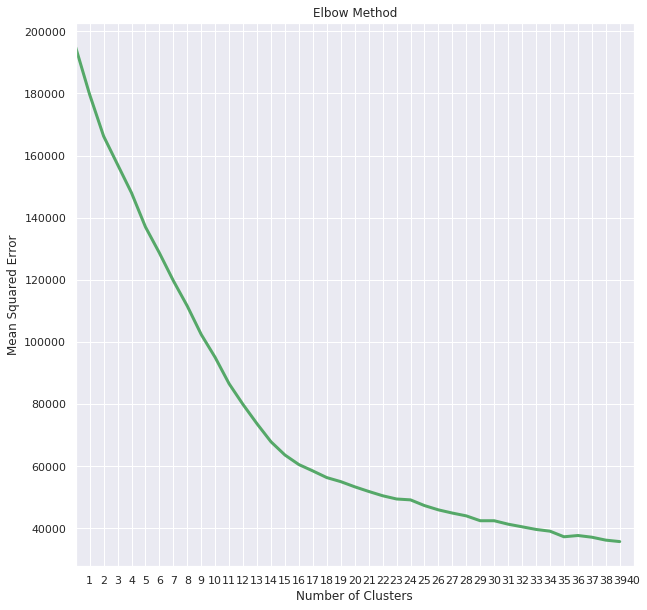

In [102]:
plot_res = result.inertia.plot(xticks = result.n_clusters,
                    title  = 'Elbow Method',
                    lw     = 3,
                    color  = "g"
                      )
plot_res.set_xlabel('Number of Clusters')
plot_res.set_ylabel('Mean Squared Error')

> Based on the Elbow method, the best point to use is the point where the graph begin to reduce the inclination. Seeing it and analysing our graph, we can try to use 17 as the number of clusters.

![Elbow Method](https://i.stack.imgur.com/t7v7J.png)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f78c6bc2710>,
      dtype=object)

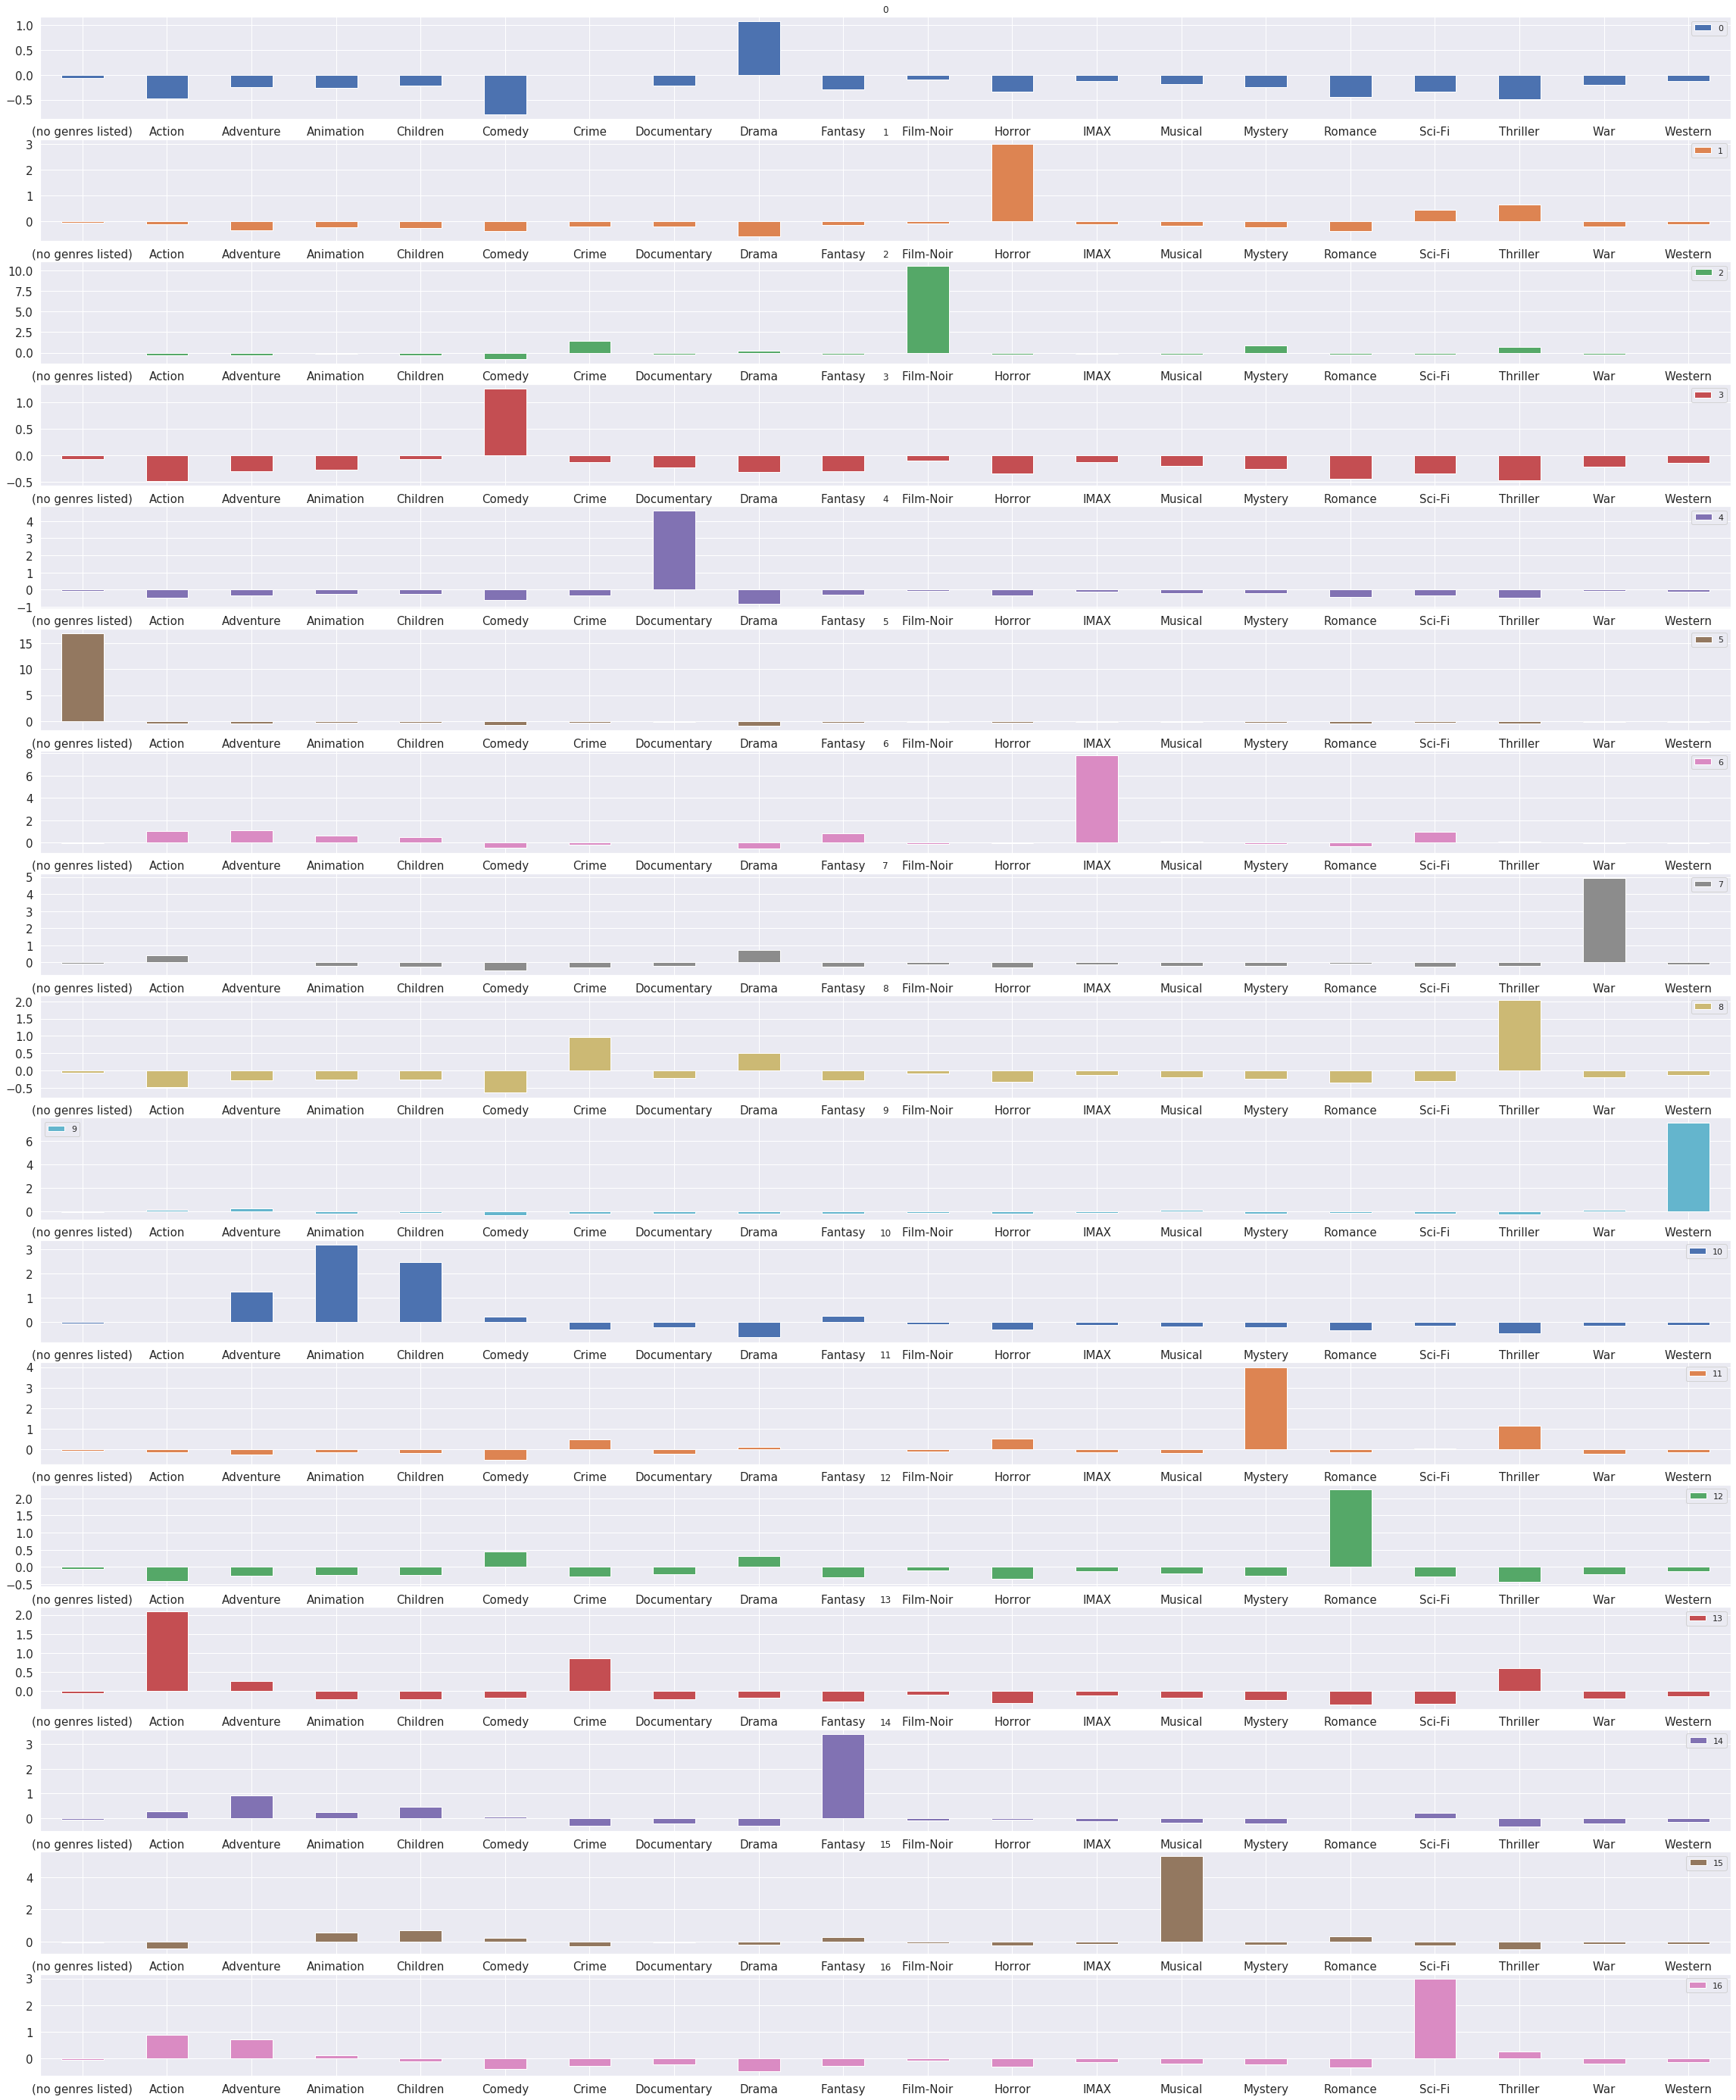

In [107]:
# Remaking the process of training
model = KMeans(n_clusters = 17)
model.fit(scaled_genres)
groups = pd.DataFrame(data = model.cluster_centers_,
                      columns = genres.columns)

groups.transpose().plot.bar(subplots = True,
                            sharex   = False,
                            rot      = 0,
                            figsize  = (40,50), 
                            fontsize = 15,
                            legend   = True, 
                            grid     = True)

In [113]:
group = 9 # Western films
data_filter =  model.labels_ == group
movies[data_filter].sample(15)

movieId                                              title  \
3883     5456                                 Wagons East (1994)   
9581   175197                              The Dark Tower (2017)   
5437    25959                          Annie Get Your Gun (1950)   
5459    26142                                Major Dundee (1965)   
7833    93193                                    Red Hill (2010)   
4479     6617                                  Open Range (2003)   
4517     6691                                        Dust (2001)   
6982    66785  Good, the Bad, the Weird, The (Joheunnom nabbe...   
3347     4534  Return to Snowy River (a.k.a. The Man From Sno...   
3208     4329                                   Rio Bravo (1959)   
5839    32392                     800 Bullets (800 Balas) (2002)   
8063    99114                            Django Unchained (2012)   
4651     6950                                Missing, The (2003)   
3869     5440                    She Wore a Yellow Ribbon (1949)   
2517     3365                              Searchers, The (1956)   

                               genres  (no genres listed)  Action  Adventure  \
3883                   Comedy|Western                   0       0          0   
9581    Fantasy|Horror|Sci-Fi|Western                   0       0          0   
5437   Comedy|Musical|Romance|Western                   0       0          0   
5459            Adventure|War|Western                   0       0          1   
7833           Crime|Thriller|Western                   0       0          0   
4479                          Western                   0       0          0   
4517                    Drama|Western                   0       0          0   
6982  Action|Adventure|Comedy|Western                   0       1          1   
3347          Adventure|Drama|Western                   0       0          1   
3208                          Western                   0       0          0   
5839       Comedy|Crime|Drama|Western                   0       0          0   
8063             Action|Drama|Western                   0       1          0   
4651       Adventure|Thriller|Western                   0       0          1   
3869                          Western                   0       0          0   
2517                    Drama|Western                   0       0          0   

      Animation  Children  Comedy  Crime  ...  Film-Noir  Horror  IMAX  \
3883          0         0       1      0  ...          0       0     0   
9581          0         0       0      0  ...          0       1     0   
5437          0         0       1      0  ...          0       0     0   
5459          0         0       0      0  ...          0       0     0   
7833          0         0       0      1  ...          0       0     0   
4479          0         0       0      0  ...          0       0     0   
4517          0         0       0      0  ...          0       0     0   
6982          0         0       1      0  ...          0       0     0   
3347          0         0       0      0  ...          0       0     0   
3208          0         0       0      0  ...          0       0     0   
5839          0         0       1      1  ...          0       0     0   
8063          0         0       0      0  ...          0       0     0   
4651          0         0       0      0  ...          0       0     0   
3869          0         0       0      0  ...          0       0     0   
2517          0         0       0      0  ...          0       0     0   

      Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
3883        0        0        0       0         0    0        1  
9581        0        0        0       1         0    0        1  
5437        1        0        1       0         0    0        1  
5459        0        0        0       0         0    1        1  
7833        0        0        0       0         1    0        1  
4479        0        0        0       0         0    0 